N = 20, Norm at t = 4pi: 3.98e+26


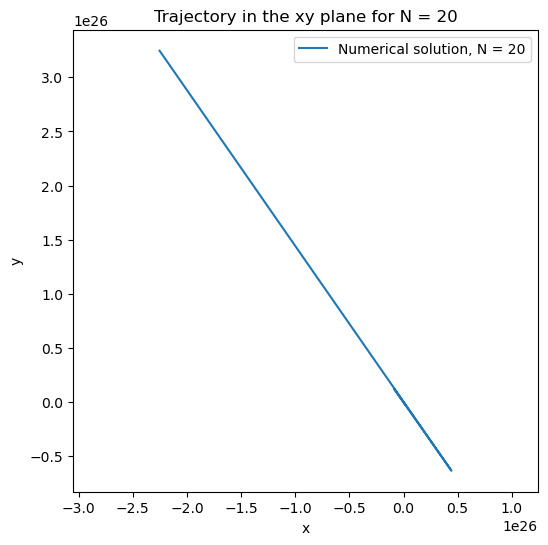

N = 40, Norm at t = 4pi: 1.12e+54


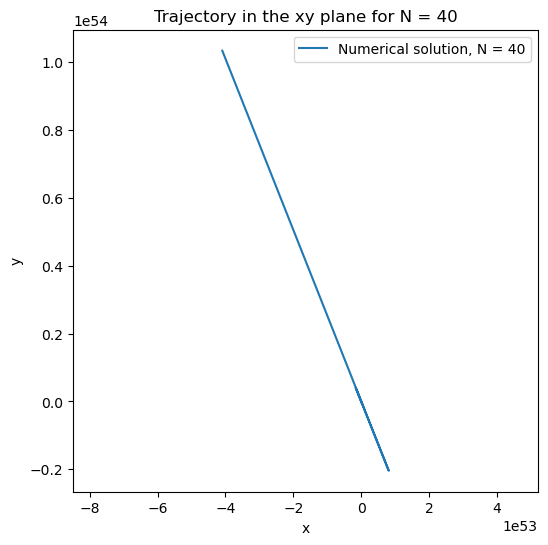

N = 80, Norm at t = 4pi: 2.54e+109


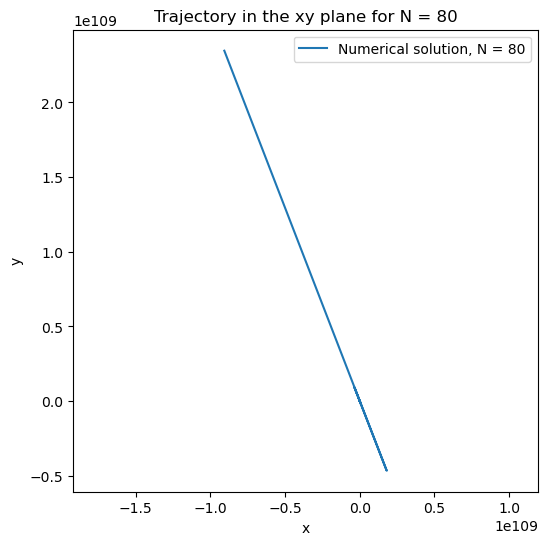

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(y):
    x, y_val, u, v = y
    denom = x**2 + y_val**2
    return np.array([u, v, -x/denom, -y_val/denom])

def two_step_method(N):
    h = 2*np.pi/N
    T = 4*np.pi
    steps = int(T/h)
    y = np.zeros((steps+1, 4))
    t = np.linspace(0, T, steps+1)
    
    y[0] = np.array([1, 0, 0, 1])
    y[1] = y[0] + h * f(y[0])

    for n in range(1, steps):
        y[n+1] = -4*y[n] + 5*y[n-1] + h*(4*f(y[n]) + 2*f(y[n-1]))
    
    return t, y

for N in [20, 40, 80]:
    t, y = two_step_method(N)
    norm_final = np.linalg.norm(y[-1])
    print(f"N = {N}, Norm at t = 4pi: {norm_final:.2e}")
    
    plt.figure(figsize=(6,6))
    plt.plot(y[:,0], y[:,1], label=f"Numerical solution, N = {N}")
    
    # theta = np.linspace(0, 2*np.pi, 200)
    # plt.plot(np.cos(theta), np.sin(theta), 'k--', label="Exact solution (unit circle)")
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Trajectory in the xy plane for N = {N}")
    plt.legend()
    plt.axis('equal')
    plt.show()



N = 20, Norm at t = 8pi: 1.47e+00


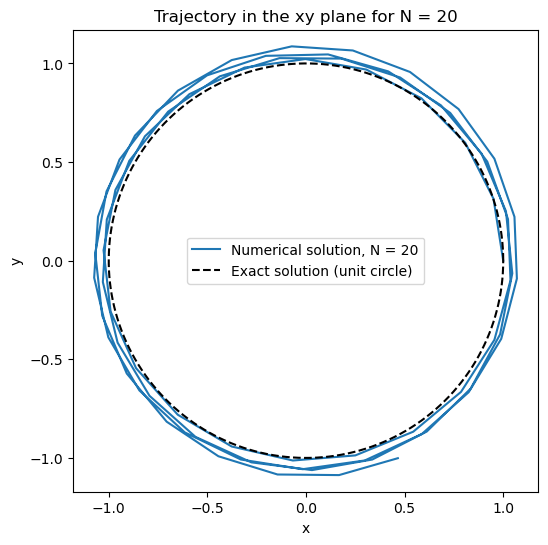

N = 40, Norm at t = 8pi: 1.42e+00


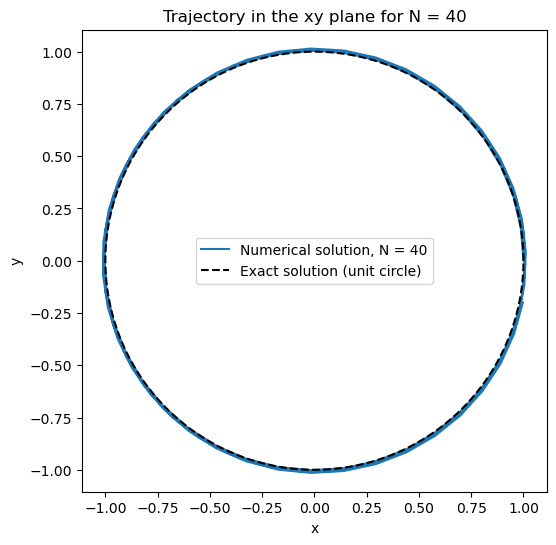

N = 80, Norm at t = 8pi: 1.42e+00


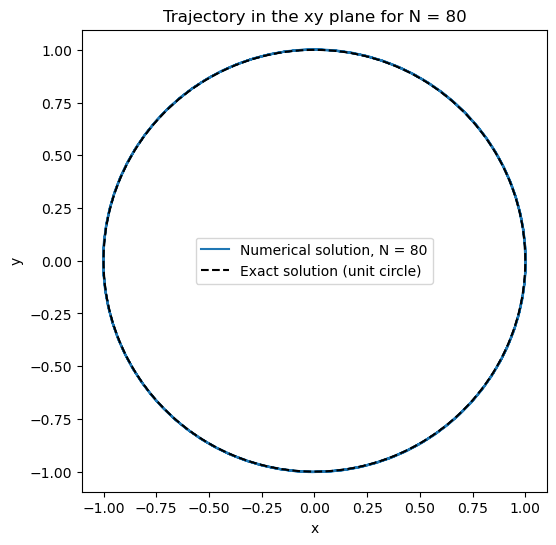

In [2]:
def midpoint_method(N):
    h = 2*np.pi/N
    T = 8*np.pi
    steps = int(T/h)
    y = np.zeros((steps+1, 4))
    t = np.linspace(0, T, steps+1)

    y[0] = np.array([1, 0, 0, 1])
    for n in range(steps):
        y_mid = y[n] + 0.5 * h * f(y[n])
        y[n+1] = y[n] + h * f(y_mid)

    return t, y

for N in [20, 40, 80]:
    t, y = midpoint_method(N)
    norm_final = np.linalg.norm(y[-1])
    print(f"N = {N}, Norm at t = 8pi: {norm_final:.2e}")
    
    plt.figure(figsize=(6,6))
    plt.plot(y[:,0], y[:,1], label=f"Numerical solution, N = {N}")
    
    theta = np.linspace(0, 2*np.pi, 200)
    plt.plot(np.cos(theta), np.sin(theta), 'k--', label="Exact solution (unit circle)")
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Trajectory in the xy plane for N = {N}")
    plt.legend()
    plt.axis('equal')
    plt.show()
